In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('NSCC_R2_Q4.csv')
df.head()

,Wavelength,Amount of light blocked
0,0.880732,13919.6763
1,0.627869,13969.6758
2,0.638584,14049.6750
3,0.645012,13953.0093
4,0.653584,13959.6759


In [3]:
df.isnull().sum()

Wavelength                 0
Amount of light blocked    0
dtype: int64

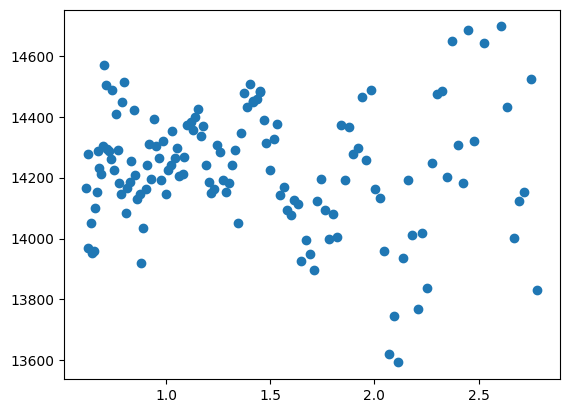

In [7]:
plt.scatter(df['Wavelength'], df['Amount of light blocked'])

In [8]:
new_df = df.sort_values('Wavelength')
new_df.head()

,Wavelength,Amount of light blocked
6,0.617155,14166.3405
7,0.623583,14276.3394
1,0.627869,13969.6758
2,0.638584,14049.6750
3,0.645012,13953.0093


In [93]:
new_df['Amount of light blocked'] = new_df['Amount of light blocked']/1000000

In [94]:
new_df.head()

,Wavelength,Amount of light blocked
6,0.617155,0.014166
7,0.623583,0.014276
1,0.627869,0.013970
2,0.638584,0.014050
3,0.645012,0.013953


In [99]:
df.head()

,Wavelength,Amount of light blocked
0,0.880732,13919.6763
1,0.627869,13969.6758
2,0.638584,14049.6750
3,0.645012,13953.0093
4,0.653584,13959.6759


In [100]:
new_df['Amount of light blocked'] = -np.log10(df['Amount of light blocked'])

In [98]:
new_df.to_csv('new_data.csv', index=False)

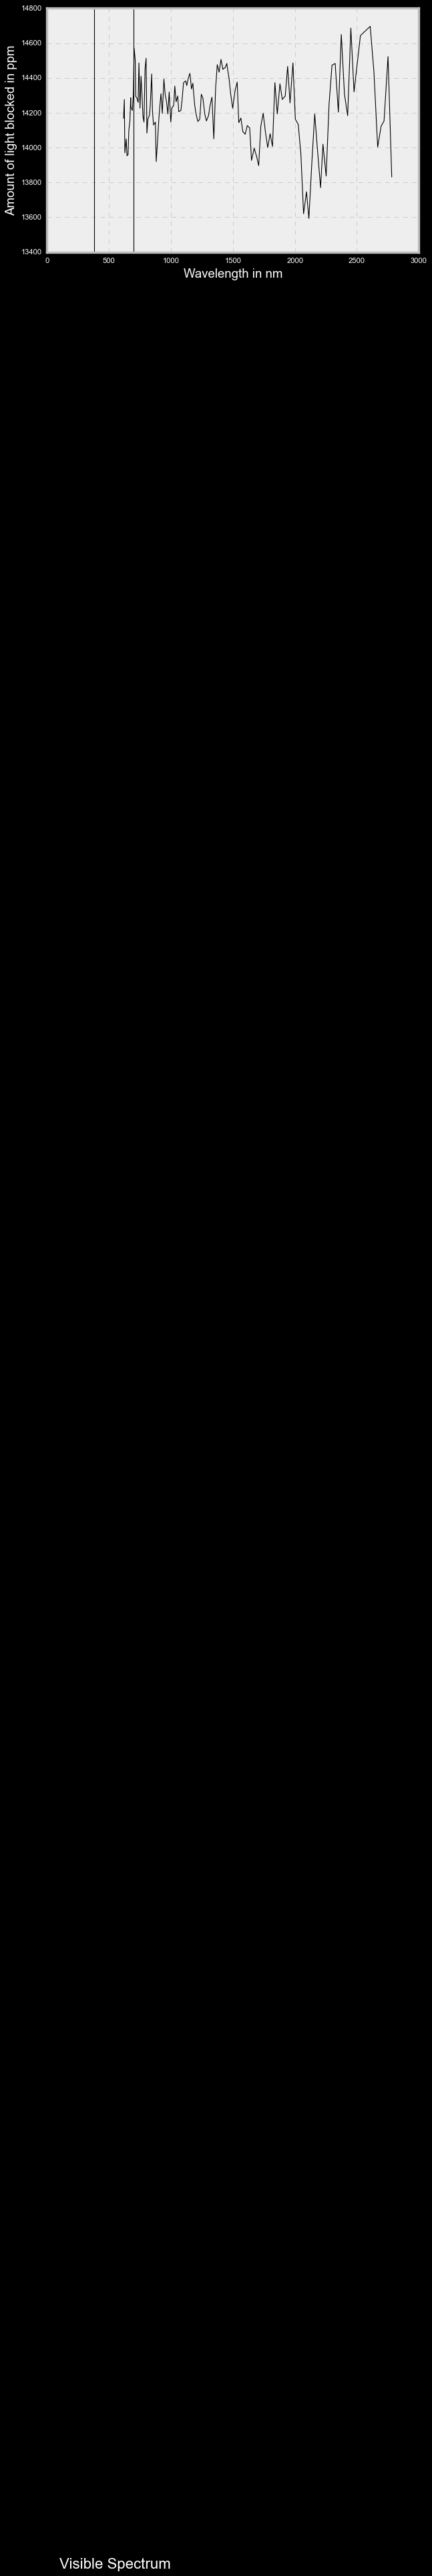

In [87]:
plt.plot(new_df['Wavelength']*1000, new_df['Amount of light blocked'], lw=1, c='k')
plt.xlabel('Wavelength in nm')
plt.ylabel('Amount of light blocked in ppm')
# plt.title('')
plt.axvline(x=380, c='k', lw=1)
plt.axvline(x=700, c='k', lw=1)
plt.text(100, 100, 'Visible Spectrum', fontsize = 20)
plt.savefig('Q4_plot.png')
# plt.tight_layout()

In [92]:
df.head()

,Wavelength,Amount of light blocked
0,0.880732,13919.6763
1,0.627869,13969.6758
2,0.638584,14049.6750
3,0.645012,13953.0093
4,0.653584,13959.6759


In [143]:
# import matplotlib.axes as ax

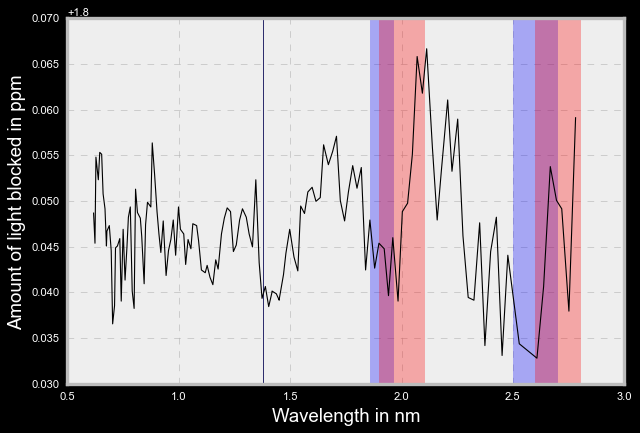

In [154]:
fig, ax = plt.subplots()
ax.plot(new_df['Wavelength'], new_df['Amount of light blocked'], lw=1, c='k')
plt.xlabel('Wavelength in nm')
plt.ylabel('Amount of light blocked in ppm')
#water
ax.axvspan(2.5, 2.7, alpha=0.3, color='blue')
ax.axvspan(1.86, 1.96, alpha=0.3, color='blue')
ax.axvspan(1.38, 1.38, alpha=1, color='blue')
#co2
# ax.axvspan(4.2, 4.4, alpha=0.3, color='red')
ax.axvspan(2.6, 2.8, alpha=0.3, color='red')
ax.axvspan(1.9, 2.1, alpha=0.3, color='red')
#co
ax.axvspan(1.38, 1.38, alpha=1, color='black')

# plt.text(100, 100, 'Visible Spectrum', fontsize = 20)
plt.savefig('Q4_plot.png')
# plt.tight_layout()

<AxesSubplot: xlabel='Wavelength', ylabel='Amount of light blocked'>

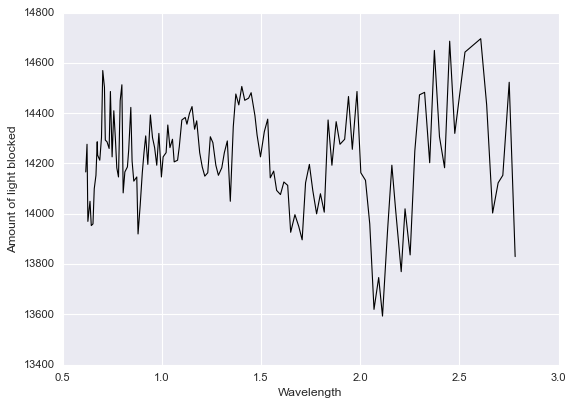

In [54]:
sns.lineplot(data=new_df, x='Wavelength', y='Amount of light blocked', c='k', lw=1)

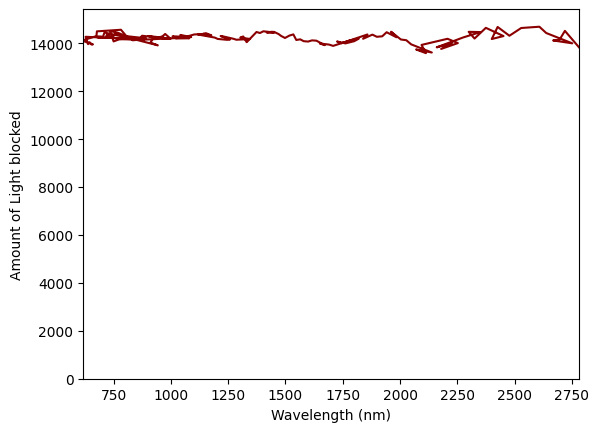

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors



def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

fig, axs = plt.subplots(1, 1)

wavelengths = df['Wavelength']*1000
spectrum = (5 + np.sin(wavelengths*0.1)**2) * np.exp(-0.00002*(wavelengths-600)**2)
plt.plot(wavelengths, spectrum, color='darkred')

y = np.linspace(0, 6, 100)
X,Y = np.meshgrid(df['Wavelength']*1000, df['Amount of light blocked'])

extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

plt.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Amount of Light blocked')

plt.fill_between(wavelengths, spectrum, 8, color='w')
plt.savefig('WavelengthColors.png', dpi=200)

plt.show()

In [28]:
df['Amount of lig

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Wavelength               139 non-null    float64
 1   Amount of light blocked  139 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)

wavelengths = np.linspace(200, 1000, 1000)
spectrum = (5 + np.sin(wavelengths*0.1)**2) * np.exp(-0.00002*(wavelengths-600)**2)
plt.plot(wavelengths, spectrum, color='darkred')

y = np.linspace(0, 6, 100)
X,Y = np.meshgrid(wavelengths, y)
X[X<400] = 400
extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

plt.imshow(X, clim=(350,820),  extent=extent, cmap=plt.get_cmap('spectral'), aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

plt.fill_between(wavelengths, spectrum, 8, color='w')
plt.savefig('WavelengthColors.png', dpi=200)

plt.show()

In [101]:
new_df.head()

,Wavelength,Amount of light blocked
6,0.617155,-4.151258
7,0.623583,-4.154617
1,0.627869,-4.145186
2,0.638584,-4.147666
3,0.645012,-4.144668


In [103]:
df.head()

,Wavelength,Amount of light blocked
0,0.880732,13919.6763
1,0.627869,13969.6758
2,0.638584,14049.6750
3,0.645012,13953.0093
4,0.653584,13959.6759


In [104]:
new_df['Amount of light blocked'] = -np.log10(df['Amount of light blocked']/1000000)

In [105]:
new_df.head()

,Wavelength,Amount of light blocked
6,0.617155,1.848742
7,0.623583,1.845383
1,0.627869,1.854814
2,0.638584,1.852334
3,0.645012,1.855332


In [106]:
new_df.to_csv('new2.csv', index=False)

In [107]:
df.head()

,Wavelength,Amount of light blocked
0,0.880732,13919.6763
1,0.627869,13969.6758
2,0.638584,14049.6750
3,0.645012,13953.0093
4,0.653584,13959.6759


In [113]:
data = df.sort_values('Amount of light blocked')

In [114]:
data.head()

,Wavelength,Amount of light blocked
115,2.112899,13593.0129
114,2.070041,13619.6793
116,2.093613,13746.3447
117,2.207187,13769.6778
138,2.781484,13829.6772


In [119]:
data.reset_index(inplace=True)

In [120]:
data.head()

,index,Wavelength,Amount of light blocked
0,115,2.112899,13593.0129
1,114,2.070041,13619.6793
2,116,2.093613,13746.3447
3,117,2.207187,13769.6778
4,138,2.781484,13829.6772


In [129]:
data.drop('index', axis=1, inplace=True)

<AxesSubplot: xlabel='Wavelength', ylabel='Amount of light blocked'>

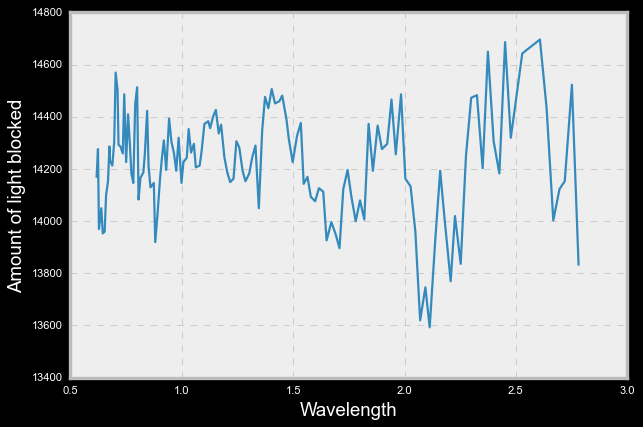

In [123]:
sns.lineplot(data=data, x='Wavelength', y='Amount of light blocked')

Text(0, 0.5, 'Amount of light blocked in ppm')

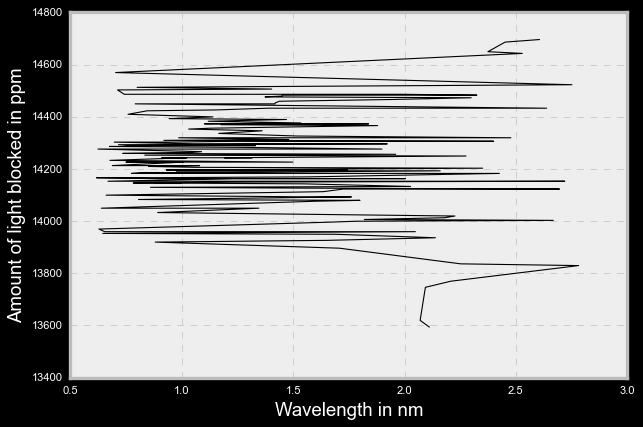

In [134]:
plt.plot(data['Wavelength'], data['Amount of light blocked'], lw=1, c='k')
plt.xlabel('Wavelength in nm')
plt.ylabel('Amount of light blocked in ppm')
# plt.title('')
# plt.axvline(x=380, c='k', lw=1)
# plt.axvline(x=700, c='k', lw=1)

In [131]:
data.head()

,Wavelength,Amount of light blocked
0,2.112899,13593.0129
1,2.070041,13619.6793
2,2.093613,13746.3447
3,2.207187,13769.6778
4,2.781484,13829.6772


In [135]:
data=df

In [136]:
data.head()

,Wavelength,Amount of light blocked
0,0.880732,13919.6763
1,0.627869,13969.6758
2,0.638584,14049.6750
3,0.645012,13953.0093
4,0.653584,13959.6759
